In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('LoanApprovalData.csv')

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [5]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [6]:
#create a total income column
df['TotalIncome'] = df['Applicant_Income'] + df['Coapplicant_Income']

In [7]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status', 'TotalIncome'],
      dtype='object')

In [8]:
#handle missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Term'].fillna(df['Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
TotalIncome           0
dtype: int64

# of Applicants by Marital Status
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

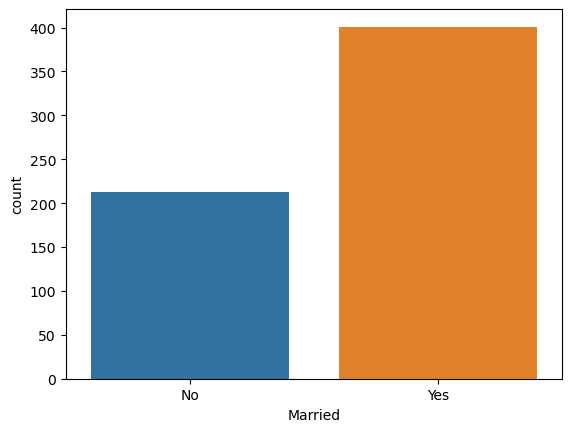

In [9]:
print("# of Applicants by Marital Status")
print(df['Married'].value_counts())
sns.countplot(x = 'Married', data = df)

# of Applicants by Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

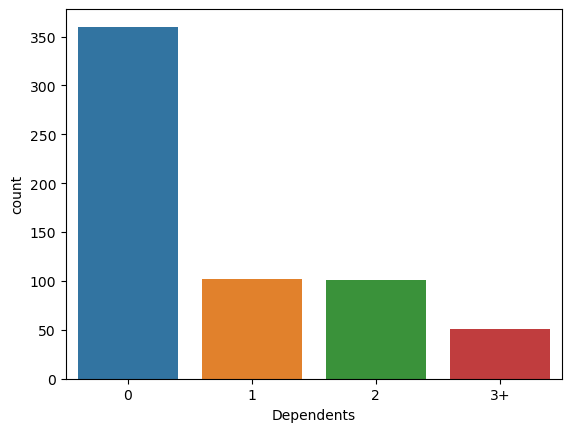

In [10]:
print("# of Applicants by Dependents")
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents', data = df)

# of Applicants by Self-Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

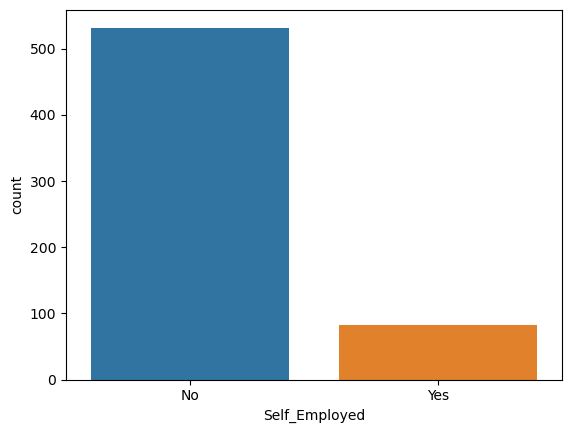

In [11]:
print("# of Applicants by Self-Employed")
print(df['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed', data = df)

# of Applicants by Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

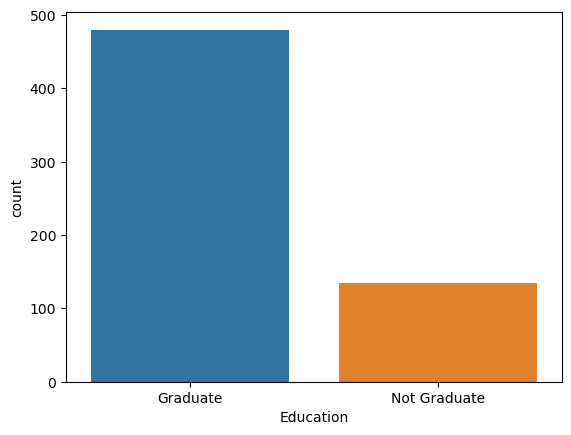

In [12]:
print("# of Applicants by Education")
print(df['Education'].value_counts())
sns.countplot(x = 'Education', data = df)

# of Applicants by Credit History
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

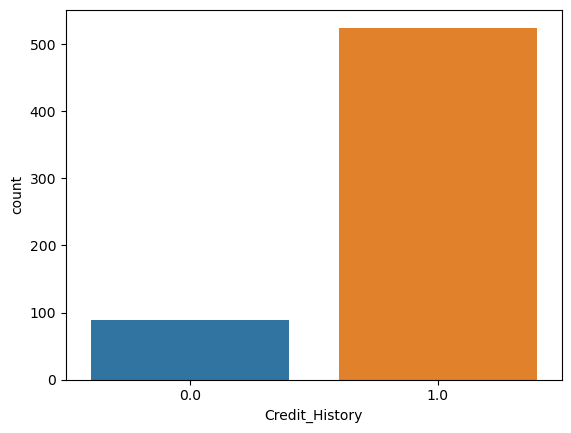

In [13]:
print("# of Applicants by Credit History")
print(df['Credit_History'].value_counts())
sns.countplot(x = 'Credit_History', data = df)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Area'] = le.fit_transform(df['Area'])
df['Status'] = le.fit_transform(df['Status'])

In [15]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status,TotalIncome
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.097095,-0.074030,0.009170,-0.025752,0.017987,0.093191
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.132866,-0.100912,0.010938,0.004257,0.091478,0.083319
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.154443,-0.103864,-0.040160,-0.000244,0.010118,0.125590
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.175070,-0.073928,-0.073658,-0.065243,-0.085884,-0.161362
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.108293,-0.033739,-0.001550,-0.030860,-0.003700,0.113000
Applicant_Income,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.539615,-0.046531,-0.018615,-0.009500,-0.004710,0.893037
Coapplicant_Income,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189237,-0.059383,0.011134,0.010522,-0.059187,0.342781
Loan_Amount,0.097095,0.132866,0.154443,-0.175070,0.108293,0.539615,0.189237,1.000000,0.039440,0.006015,-0.053658,-0.008782,0.596142
Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.039440,1.000000,-0.004705,-0.076120,-0.022549,-0.070917
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,0.006015,-0.004705,1.000000,0.001963,0.540556,-0.012563


In [16]:
#feature engineering on influential feature, Credit_History
df['Good_Credit_History'] = df['Credit_History'].apply(lambda x: 1 if x == 1 else 0)
df['Good_Credit_History'] = le.fit_transform(df['Good_Credit_History'])

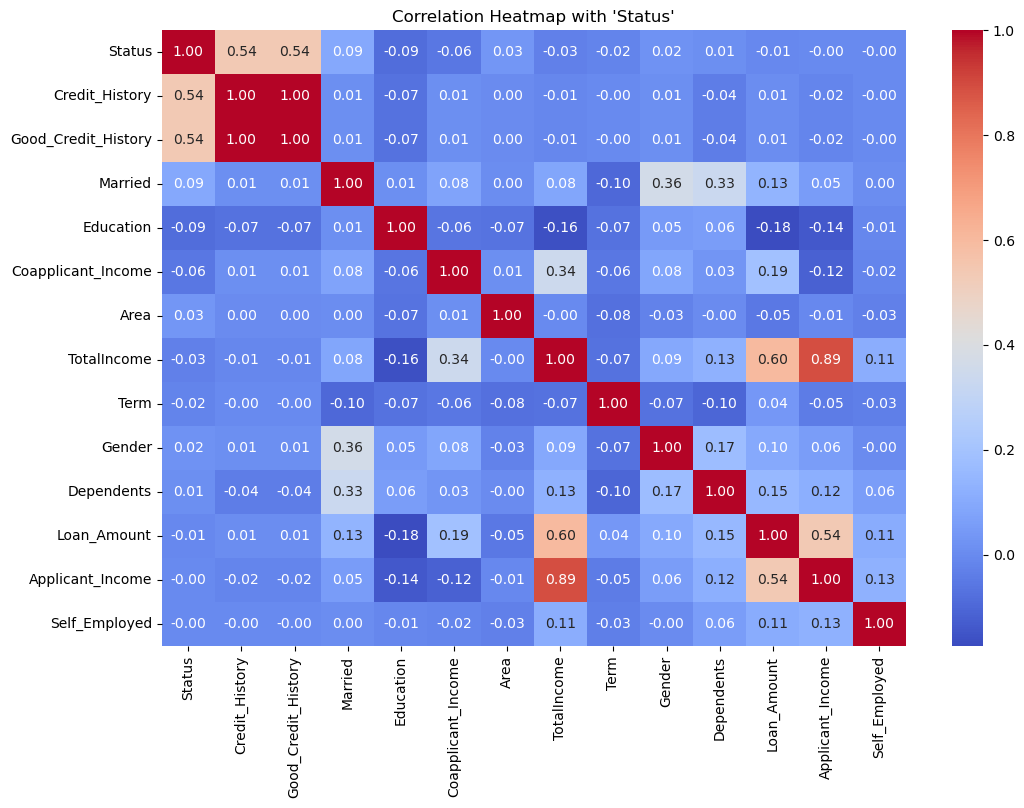

In [17]:
#heatmap to visualize correlations to Status
target_feature = 'Status'
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix[target_feature]
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)
top_features = sorted_correlation.index

plt.figure(figsize=(12, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Heatmap with '{target_feature}'")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#identify our target feature: Loan_Status
X = df.drop('Status', axis=1)
y = df['Status']

#normalize numeric features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
#Random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 76.42%
              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123



In [21]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred2))

Logistic Regression Accuracy: 78.86%
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [22]:
#K-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred3))

KNN Accuracy: 77.24%
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [23]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4)
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred4))

Naive Bayes Accuracy: 78.05%
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



Logistic Regression seems to be the best-performing model, for our project.

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 0.1}


In [25]:
final_model = LogisticRegression(C=0.1)
final_model.fit(X_train, y_train)

final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")
print(classification_report(y_test, final_predictions))

Final Model Accuracy: 78.86%
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Gender: -0.0637270370201183
Married: 0.35812971630739027
Dependents: 0.10576779499624377
Education: -0.1712385945191184
Self_Employed: 0.03387911649668364
Applicant_Income: -0.034355304122073445
Coapplicant_Income: -0.11588535321260894
Loan_Amount: -0.08514854991196819
Term: 0.020581648126755097
Credit_History: 1.1558763855733913
Area: 0.09005380029055608
TotalIncome: -0.09558502999982602
Good_Credit_History: 1.1558763855733925


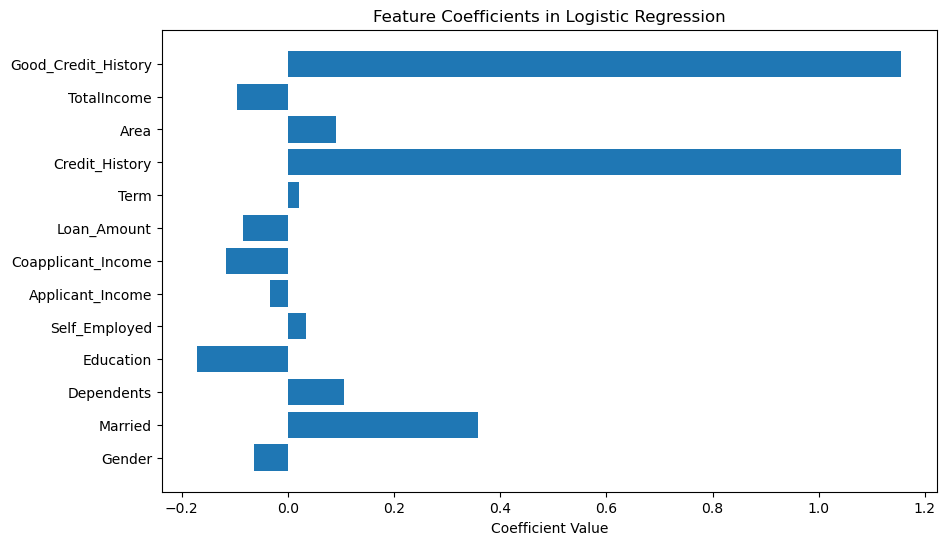

In [26]:
coefficients = final_model.coef_[0]
feature_names = X.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")
    
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Logistic Regression')
plt.show()